In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Alberto\Documents\AI Python course\Python\Machine learning\Housing\housing.csv")

In [139]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df
y = df.pop('median_house_value')
X.pop('ocean_proximity')

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [141]:
X = X.interpolate(method='linear')

In [148]:
IsFo = IsolationForest(contamination=0.02, random_state=1) # valeur abbérante tester 2%

IsFo.fit(X)

C:\Users\Alberto\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.02, random_state=1)

In [149]:
InOut = IsFo.predict(X)

In [150]:
Is_Out = (InOut == -1)

In [151]:
Is_Out.sum()

413

In [152]:
X[Is_Out] # all outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849
508,-122.30,37.84,14.0,7355.0,2408.0,3100.0,2051.0,4.0018
570,-122.24,37.72,5.0,18634.0,2885.0,7427.0,2718.0,7.6110
576,-122.06,37.77,12.0,14316.0,2045.0,5781.0,2007.0,7.2634
...,...,...,...,...,...,...,...,...
20530,-121.76,38.57,11.0,15018.0,3008.0,7984.0,2962.0,3.1371
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250


In [155]:
from sklearn.decomposition import PCA

transformer = PCA(n_components=2, random_state=0)
transformer.fit(X)

X_t = transformer.transform(X)
X_t.shape

(20640, 2)

In [156]:
transformer.components_

array([[ 4.66730740e-05, -4.57567463e-05, -1.81919700e-03,
         8.81854772e-01,  1.61161950e-01,  4.18159922e-01,
         1.46621755e-01,  1.20526717e-04],
       [ 4.25537684e-04, -5.87772566e-04,  1.59097155e-03,
        -4.46721610e-01,  4.91213617e-02,  8.87517350e-01,
         1.01662281e-01, -1.25366742e-03]])

In [157]:
np.mean(transformer.components_ == 0)

0.0

In [161]:
X_t = pd.DataFrame(data = X_t, columns = [['PCA1','PCA2']])

In [166]:
X_t

,PCA1,PCA2
0,-2130.418751,-253.057480
1,4529.063375,-1035.228579
2,-1522.721725,-352.655014
3,-1653.583574,-204.929371
4,-1326.244779,-350.130273
...,...,...
20635,-1150.041329,-106.805961
20636,-2275.914677,-141.350107
20637,-529.881377,-210.236422
20638,-1013.129036,-282.579239


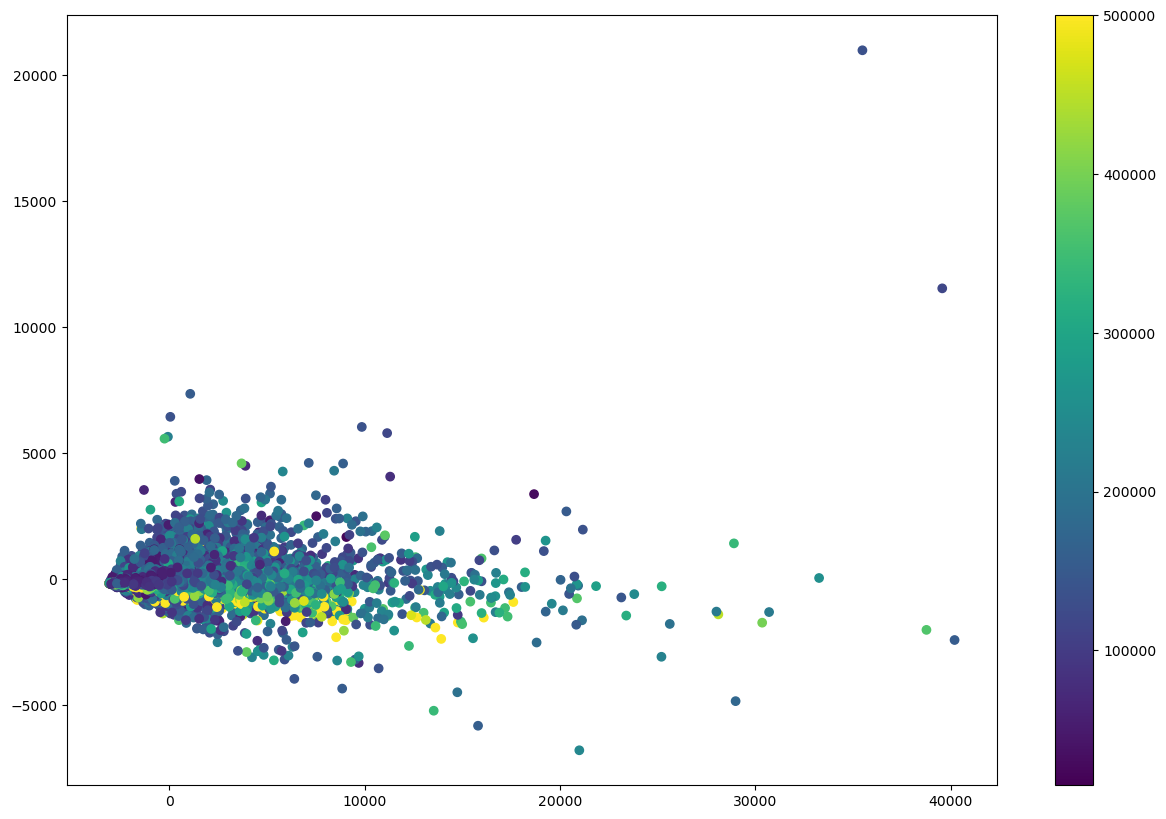

In [169]:
plt.figure(figsize=(15,10))
plt.scatter(X_t['PCA1']
            ,X_t['PCA2'],
           c=y)
plt.colorbar()
    
plt.savefig('digit_2d.pdf')

In [95]:
compr = PCA(n_components = 5)
X_compr = compr.fit_transform(X)
X_compr.shape

(20640, 5)

In [100]:
X_compr

array([[-2.13041876e+03, -2.53057550e+02,  6.53640992e+01,
         5.30248370e+00,  9.09595824e+00],
       [ 4.52906337e+03, -1.03522864e+03,  3.73027711e+01,
         1.31458373e+02,  5.73343310e-01],
       [-1.52272173e+03, -3.52655083e+02,  1.09102721e+02,
         3.46754937e+00,  2.15630099e+01],
       ...,
       [-5.29881376e+02, -2.10236526e+02, -5.54832149e+01,
        -1.42601123e+00, -1.24322668e+01],
       [-1.01312903e+03, -2.82579342e+02, -5.60950885e+01,
        -9.34570776e+00, -1.20868025e+01],
       [ 1.32620708e+02, -9.38953980e+01, -6.25854007e+01,
        -2.23272620e+01, -1.21471062e+01]])

In [101]:
IsFo = IsolationForest(contamination=0.02, random_state=1) # valeur abbérante tester 2%

IsFo.fit(X)

IsolationForest(contamination=0.02, random_state=1)

In [102]:
InOut = IsFo.predict(X)

In [103]:
Is_Out = (InOut == -1)

In [115]:
X[Is_Out][0] # all outliers

array([-1.2226e+02,  3.7800e+01,  3.6000e+01,  5.3290e+03,  2.4770e+03,
        3.4690e+03,  2.3230e+03,  2.0096e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00])

In [119]:
IsFo = IsolationForest(contamination=0.02, random_state=1) # valeur abbérante tester 2%

IsFo.fit(df)

C:\Users\Alberto\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.02, random_state=1)

In [125]:
InOut = IsFo.predict(X)
Is_Out = (InOut == -1)
df[Is_Out].mean(axis=0) / df.mean(axis=0)

C:\Users\Alberto\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


longitude                     0.998385
latitude                      0.996042
housing_median_age            0.460767
total_rooms                   4.663578
total_bedrooms                4.274742
population                    4.198351
households                    4.184739
median_income                 1.232628
ocean_proximity_<1H OCEAN     0.618133
ocean_proximity_INLAND        1.228225
ocean_proximity_ISLAND        0.000000
ocean_proximity_NEAR BAY      1.724056
ocean_proximity_NEAR OCEAN    1.128122
dtype: float64

In [123]:
df.mean(axis=0)

longitude                     -119.569704
latitude                        35.631861
housing_median_age              28.639486
total_rooms                   2635.763081
total_bedrooms                 537.717636
population                    1425.476744
households                     499.539680
median_income                    3.870671
ocean_proximity_<1H OCEAN        0.442636
ocean_proximity_INLAND           0.317393
ocean_proximity_ISLAND           0.000242
ocean_proximity_NEAR BAY         0.110950
ocean_proximity_NEAR OCEAN       0.128779
dtype: float64

In [126]:
df[Is_Out].mean(axis=0) 

longitude                      -119.376610
latitude                         35.490847
housing_median_age               13.196126
total_rooms                   12292.087167
total_bedrooms                 2298.604116
population                     5984.651332
households                     2090.443099
median_income                     4.771098
ocean_proximity_<1H OCEAN         0.273608
ocean_proximity_INLAND            0.389831
ocean_proximity_ISLAND            0.000000
ocean_proximity_NEAR BAY          0.191283
ocean_proximity_NEAR OCEAN        0.145278
dtype: float64

In [127]:
X

array([[-122.23,   37.88,   41.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.22,   37.86,   21.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.24,   37.85,   52.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-121.22,   39.43,   17.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.32,   39.43,   18.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.24,   39.37,   16.  , ...,    0.  ,    0.  ,    0.  ]])